---
## CSVファイル読み込み DataFrameに保存

In [15]:
import pandas as pd
import numpy as np

csv_encoding = 'Shift_JISx0213'
inputFile = ".\\Data\\05_DateTimeData.csv"

df = pd.read_csv(inputFile,index_col=False, encoding=csv_encoding)
display(df.shape)
display(df.head(5))
display(df.dtypes)

(312372, 6)

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
0,1,1000043,30120231,2019-05-06,13:07:11,0
1,4,1000043,30120231,2019-05-08,13:23:57,0
2,4,1000055,30120231,2019-05-08,13:23:57,0
3,2,1000055,30120231,2019-05-07,13:05:52,0
4,2,1000057,30120231,2019-05-07,13:05:52,0


ProNum       int64
AnsShNum     int64
SchCode      int64
ImpDate     object
ImpTime     object
ClaCode      int64
dtype: object

---
## ClaCode == 0 のみ抽出

In [16]:
df_Cla0 = df[df["ClaCode"] ==0]
display(df_Cla0.shape)

(292904, 6)

---
## ProNum(1～5)の値でDataFrameを分割

In [17]:
df_p1 = df_Cla0[df_Cla0["ProNum"]==1]
df_p2 = df_Cla0[df_Cla0["ProNum"]==2]
df_p3 = df_Cla0[df_Cla0["ProNum"]==3]
df_p4 = df_Cla0[df_Cla0["ProNum"]==4]
df_p5 = df_Cla0[df_Cla0["ProNum"]==5]
display(df_p1.head(5))

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
0,1,1000043,30120231,2019-05-06,13:07:11,0
11,1,1000061,30120231,2019-05-06,13:07:11,0
22,1,1000101,30120231,2019-05-06,13:07:11,0
24,1,1000104,30120231,2019-05-06,13:07:11,0
25,1,1000106,30120231,2019-05-06,13:07:11,0


---
## ImpDateでグルーピングし、グルーピングされた行数(count())を保持

In [27]:
df_p1_byDate = df_p1.groupby(["ImpDate"]).count()
df_p2_byDate = df_p2.groupby(["ImpDate"]).count()
df_p3_byDate = df_p3.groupby(["ImpDate"]).count()
df_p4_byDate = df_p4.groupby(["ImpDate"]).count()
df_p5_byDate = df_p5.groupby(["ImpDate"]).count()
display(df_p1_byDate.head(5))

,ProNum,AnsShNum,SchCode,ImpTime,ClaCode
ImpDate,,,,,
2019-04-23,126,126,126,126,126
2019-04-24,203,203,203,203,203
2019-04-25,332,332,332,332,332
2019-04-26,489,489,489,489,489
2019-04-27,323,323,323,323,323


In [28]:
df_p1_byDate['ImpDate'] = pd.to_datetime(df_p1_byDate['ImpDate'], format='%Y/%M/%D')

KeyError: 'ImpDate'

In [20]:
df_p1_byDate_count = df_p1_byDate["AnsShNum"]
#.rename({'a': 'X', 'b': 'Y'}
display(df_p1_byDate_count)
df_p1_byDate_count.dtype

ImpDate
2019-04-23      126
2019-04-24      203
2019-04-25      332
2019-04-26      489
2019-04-27      323
2019-04-28       17
2019-04-29      341
2019-04-30      489
2019-05-01      477
2019-05-02    44742
2019-05-03     6672
2019-05-04     6774
2019-05-06    11299
2019-05-08      237
2019-05-11     1993
2019-05-16      968
2019-05-18      637
2019-05-21       18
Name: AnsShNum, dtype: int64

dtype('int64')

ImpDate
2019-04-23      126
2019-04-24      203
2019-04-25      332
2019-04-26      489
2019-04-27      323
2019-04-28       17
2019-04-29      341
2019-04-30      489
2019-05-01      477
2019-05-02    44742
2019-05-03     6672
2019-05-04     6774
2019-05-06    11299
2019-05-08      237
2019-05-11     1993
2019-05-16      968
2019-05-18      637
2019-05-21       18
Name: AnsShNum, dtype: int64

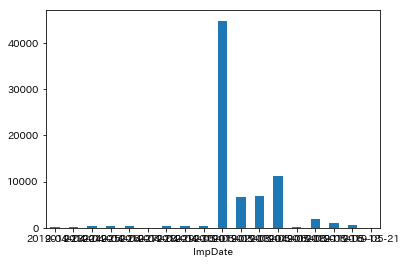

In [22]:
ax = df_p1_byDate_count.plot.bar(rot=0)
display(df_p1_byDate_count)

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


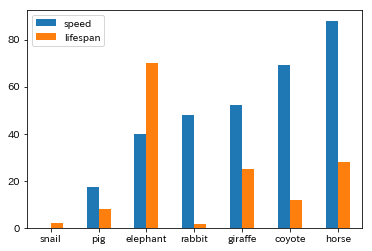

In [58]:
 speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)
display(df)

In [53]:
display(df2)

AnsShNum  SchCode  ImpTime  ClaCode
ImpDate    ProNum                                     
2019-04-23 1            347      347      347      347
           2              1        1        1        1
           3            144      144      144      144
           4             83       83       83       83
2019-04-24 1            204      204      204      204
           2              1        1        1        1
2019-04-25 1            333      333      333      333
           2              3        3        3        3
           3             51       51       51       51
           4             73       73       73       73
           5            166      166      166      166
2019-04-26 1            501      501      501      501
           2              3        3        3        3
           4             16       16       16       16
           5             58       58       58       58
2019-04-27 1            394      394      394      394
           2              5        5        5        5
           3              8        8        8        8
           4             12       12       12       12
           5             87       87       87       87
2019-04-28 1             17       17       17       17
           2              5        5        5        5
           3             57       57       57       57
           4             48       48       48       48
           5            198      198      198      198
2019-04-29 1            375      375      375      375
           2              2        2        2        2
           3             96       96       96       96
2019-04-30 1            490      490      490      490
           2              3        3        3        3
...                     ...      ...      ...      ...
2019-05-07 5           1655     1655     1655     1655
2019-05-08 1            302      302      302      302
           2            210      210      210      210
           3            185      185      185      185
           4          10757    10757    10757    10757
           5           1574     1574     1574     1574
2019-05-11 1           2587     2587     2587     2587
           2           1555     1555     1555     1555
           3           1728     1728     1728     1728
2019-05-12 4           4203     4203     4203     4203
           5            647      647      647      647
2019-05-16 1           1227     1227     1227     1227
           2            756      756      756      756
           3            872      872      872      872
2019-05-17 4           2097     2097     2097     2097
           5            360      360      360      360
2019-05-18 1            667      667      667      667
           2            527      527      527      527
           3            454      454      454      454
           4           1391     1391     1391     1391
           5            239      239      239      239
2019-05-19 5            105      105      105      105
2019-05-21 1             19       19       19       19
           2             12       12       12       12
           3              9        9        9        9
           4             16       16       16       16
           5              4        4        4        4
2019-05-25 2            152      152      152      152
2019-05-26 2             12       12       12       12
2019-05-30 4             15       15       15       15

[89 rows x 4 columns]

In [55]:
ax = df2.plot.bar(x='ImpDate', y='AnsShNum', rot=0)

KeyError: 'ImpDate'

In [49]:
df3.dropna(how='any')
df3.shape

(59308, 6)

In [38]:
df4 = df2.groupby("都道府県名").mean()
display(df4.head(5))

,答案番号,組,性別,学校コード,学校コード,話すこと未実施
都道府県名,,,,,,
三重県,2.032382e+06,2.728018,1.488361,2.420373e+06,2.420373e+06,0.002033
京都府,1.898914e+06,3.398092,1.485791,2.620867e+06,2.620867e+06,0.003746
佐賀県,2.056738e+06,2.427807,1.481197,4.119948e+06,4.119948e+06,0.001372
兵庫県,1.845386e+06,2.997884,1.471290,2.820620e+06,2.820620e+06,0.010624
北海道,1.143481e+06,2.383451,1.492740,1.203173e+05,1.203173e+05,0.005072
千葉県,1.607185e+06,3.108029,1.490358,1.220465e+06,1.220465e+06,0.041162
和歌山県,1.781512e+06,2.507723,1.483182,3.019890e+06,3.019890e+06,0.000577
埼玉県,1.551882e+06,2.929230,1.491232,1.120398e+06,1.120398e+06,0.044799
大分県,2.084006e+06,2.606360,1.456798,4.420089e+06,4.420089e+06,0.002193
